This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data. “Diabetes among the Pima is an accessible, thoughtful, and penetrating examination of a disease that afflicts minority populations specifically, but is also an indiscriminate disease that has broad implications for health and the health care system in the United States. Smith-Morris has effectively revealed the crucial role the Pima community has played and continues to play in advancing the world’s understanding and treatment of diabetes.”—David Kozak, Fort Lewis CollegeMore information regarding this data set can be seen at https://www.youtube.com/watch?v=U1JIo8JSuYo. 

In [33]:
import pandas as pd
from pandas import set_option
import seaborn as sns

In [3]:
df = pd.read_csv('pima_indians_diabetes.csv')
from pandas import set_option
set_option('display.max_columns', None)

In [32]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.shape

(768, 9)

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#display null value counts for each column
pd.set_option('display.max_rows', 120)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#correlation pearson pairwise
set_option('display.width', 100)
set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

In [11]:
# Skew for each attribute
skew = df.skew()
print(skew)

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64


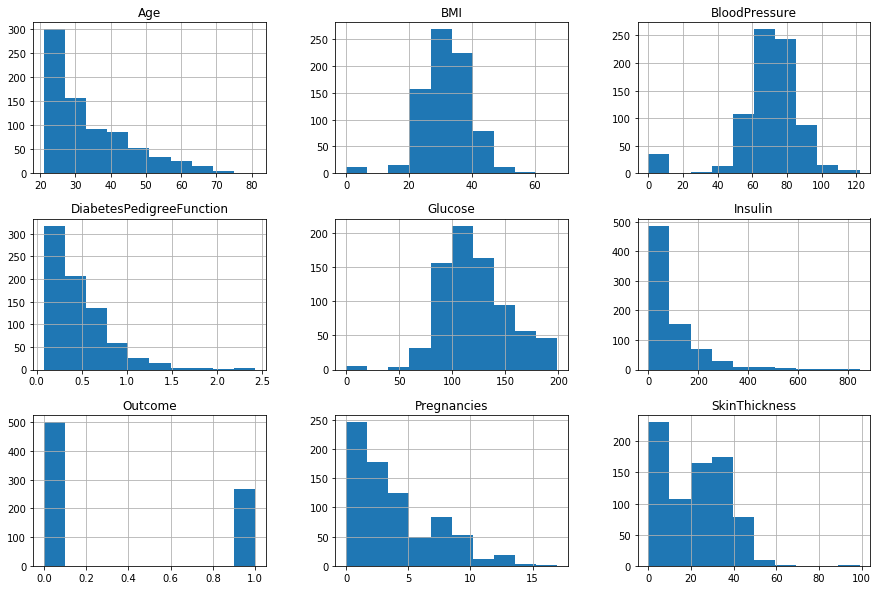

In [36]:
# Univariate Histograms
from matplotlib import pyplot as plt
df.hist(figsize=(15,10))
pyplot.show()

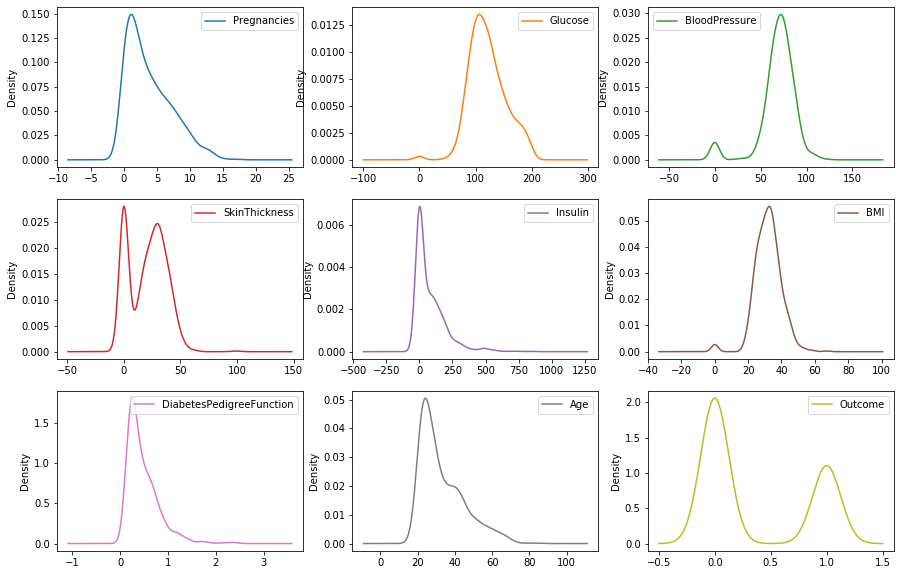

In [23]:
# density plot
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,10))
pyplot.show()

Spread of attributes with box-whisker plot. Age, pregancies, insulin, diabetes pedigree function, and skin skewed towards smaller values

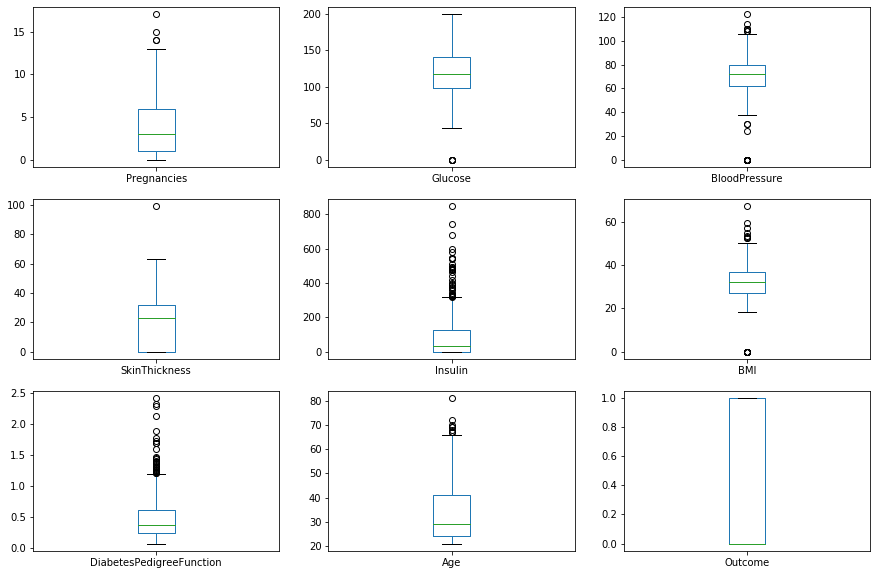

In [25]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
pyplot.show()

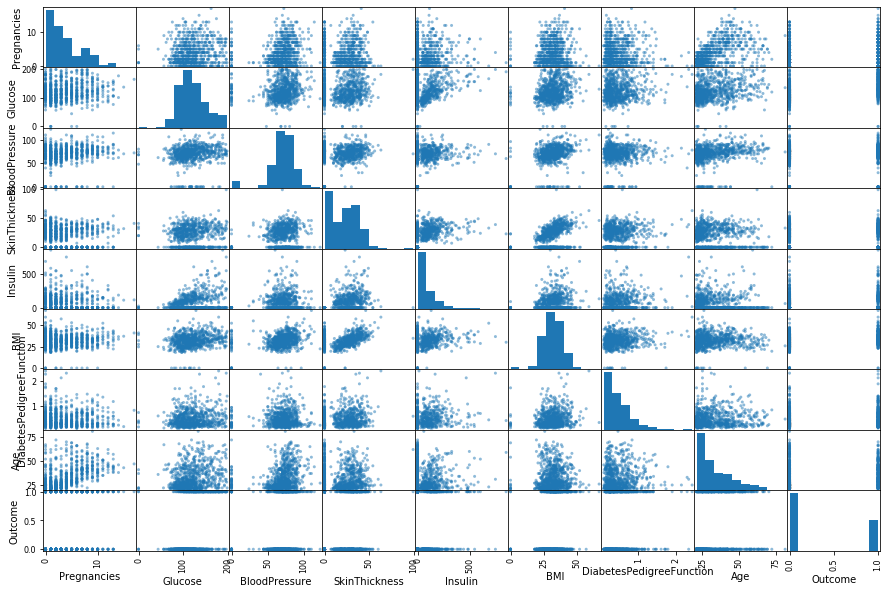

In [29]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(15,10))
pyplot.show()

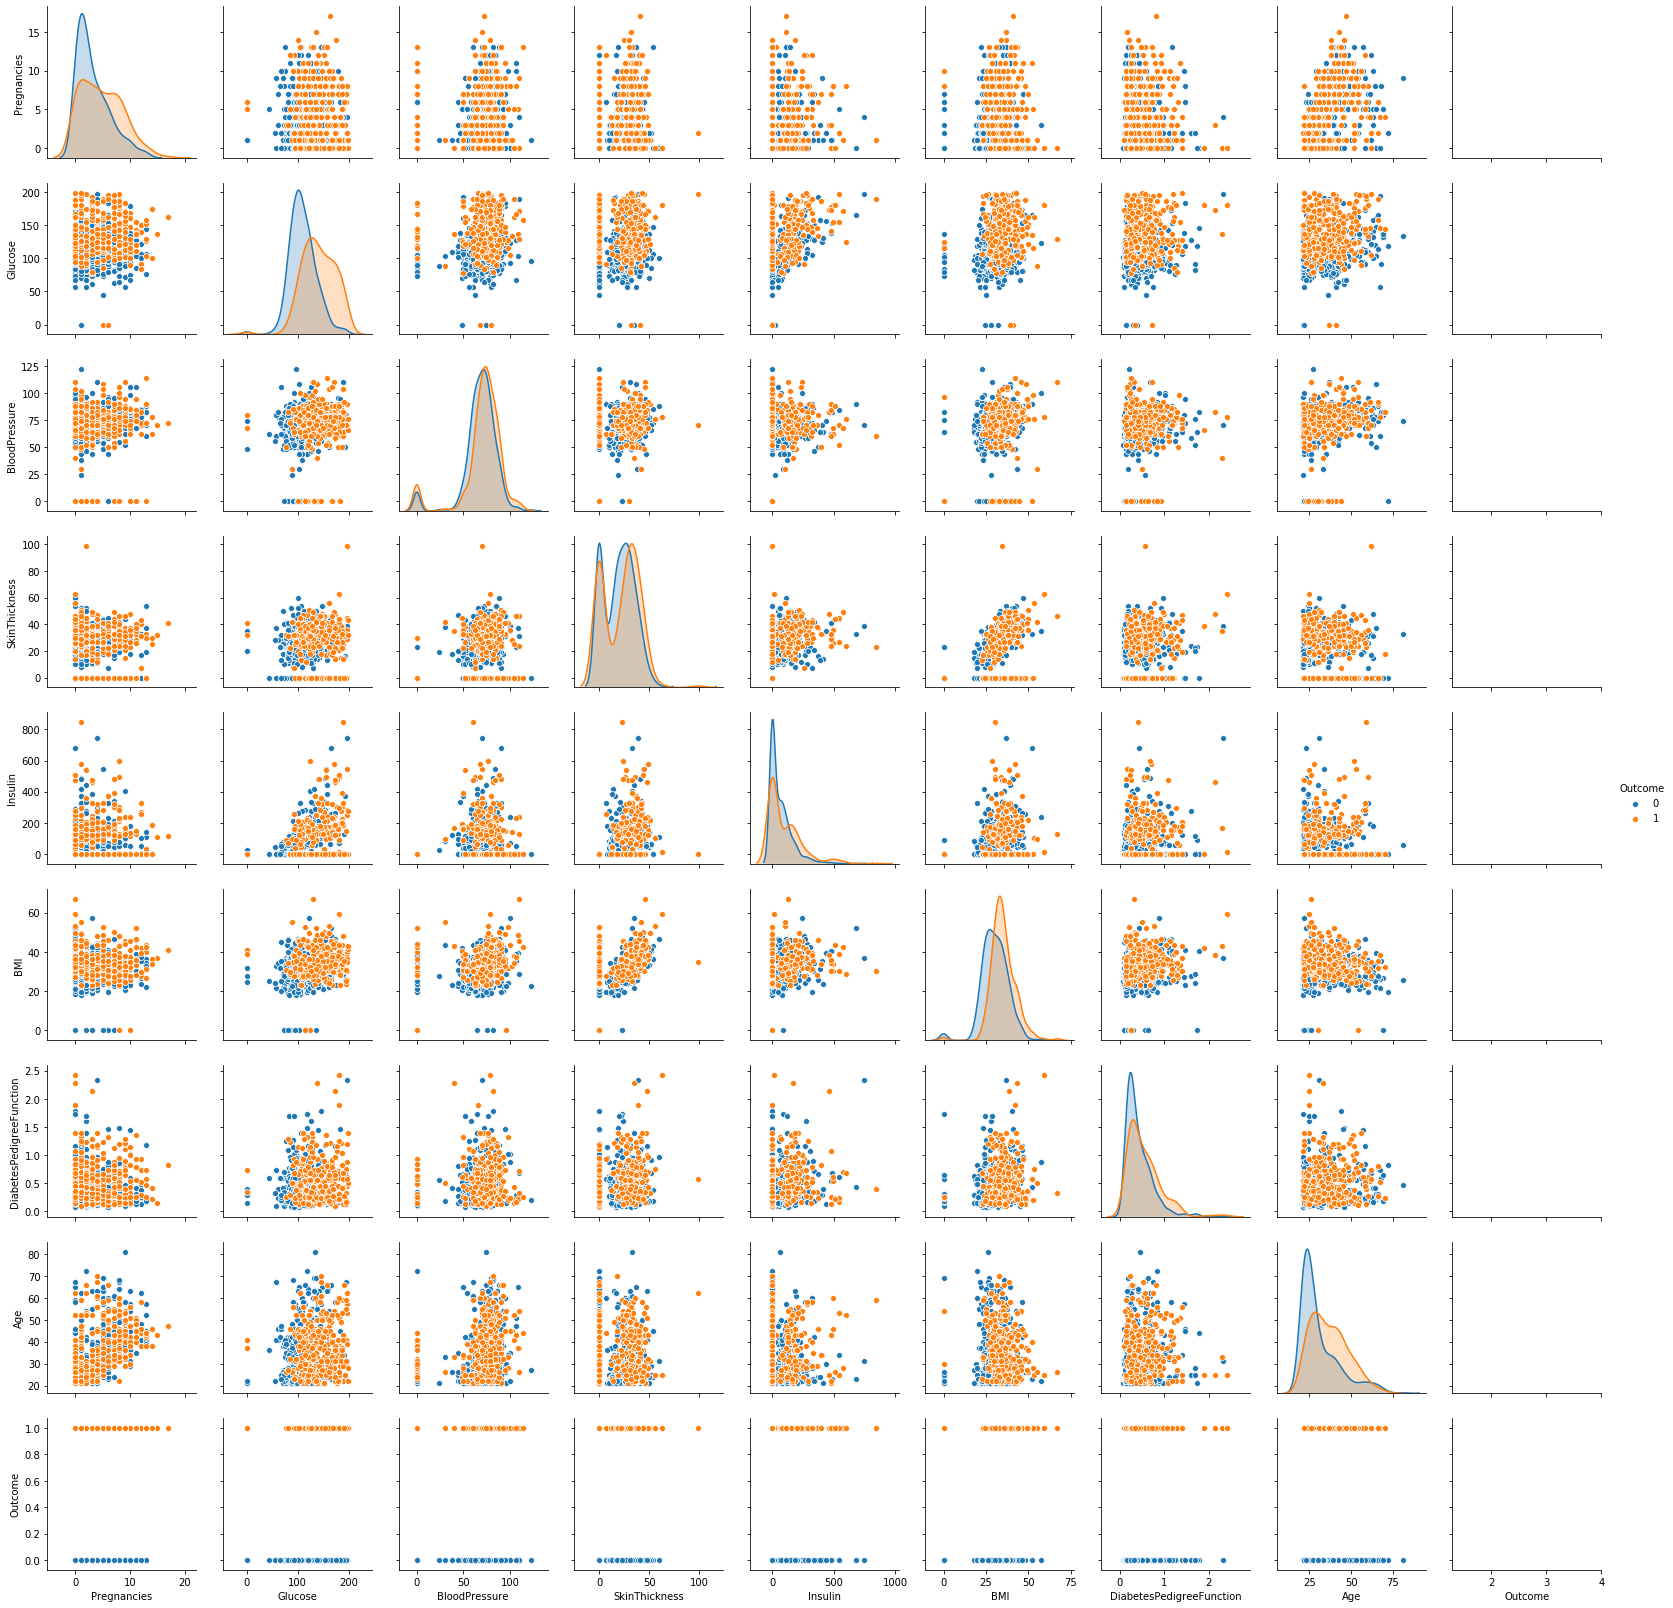

In [47]:
sns.pairplot(df, hue='Outcome')
plt.xlim(1.3, 4.0)
plt.rcParams['figure.figsize']=(10,10)
plt.show()


Pregnancies, glucose levels, BMI, skin thickness, insulin, diabetes pedigree function, and age show levels of positive correlation with the outcome attribute. 

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

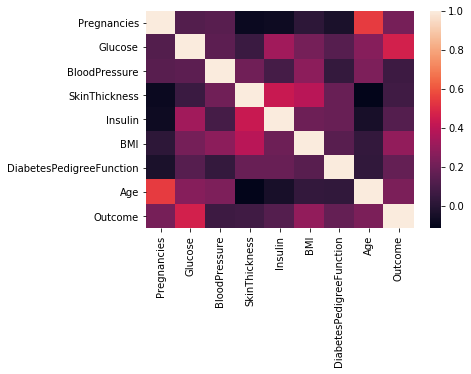

In [34]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)